# Improvement: Combine dictioanries

This script combines dictionaries reuslt and create new dummy variables based on two method:
- Majority vote
    - 0: less than half of dictioanries code 1 (uncivil/conservative/liberal)
    - 1: more than half of dictioanries code 1 (uncivil/conservative/liberal)
- At least one: any dictioanries code 1 (uncivil/conservative/liberal)
    - 0: none of dictionaries code 1
    - 1: any dictionaries code 1

In [1]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## at least one & major vote

In [2]:
data = pd.read_csv('data/Data_combination_test.csv')
data

,Unnamed: 0,Dict_Hostility_Ksiazek_2015,Dict_Civility_Ksiazek_2015,Dict_GoogeProject_OffensiveWords,Dict_Incivility_Muddiman,Dict_Swearwords_LIWC,Dict_HatebaseVocabEN,MFD1_conservative,MFD1_liberal,MFD2_conservative,...,dislikeCount_video,likeCount_video,date_difference,commentCount_video,replyCount_comment,topic,subscribers,HATELIST_FOCUSED_DUMMY,Time_comment_year,Time_video_year
0,0,1,1,0,0,0,0,0,1,1,...,195.0,3817.0,743.0,1748.0,NaN,economy,3630000.0,0,2019,2019.0
1,1,0,1,0,0,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2018,2018.0
2,2,1,0,0,1,0,0,1,0,1,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1,2019,2019.0
3,3,1,1,0,0,1,1,0,0,1,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1,2018,2018.0
4,4,0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,2018,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,768,0,1,0,0,0,0,1,0,0,...,532.0,4646.0,2862.0,3596.0,NaN,east,7690000.0,0,2019,2019.0
769,769,0,1,0,0,0,0,1,0,0,...,337.0,3515.0,1777.0,1757.0,NaN,mueller,2040000.0,0,2018,2018.0
770,770,1,0,1,0,1,0,0,0,1,...,3989.0,118676.0,3803.0,19859.0,NaN,economy,6740000.0,1,2018,2013.0
771,771,0,1,0,0,0,0,0,0,0,...,1327.0,30184.0,2029.0,4545.0,NaN,east,3190000.0,0,2019,2019.0


Define variables and dictionaries

In [3]:
dictionaries_variable = [['Incivility',['INCIVILITY_DUMMY','HATELIST_FOCUSED_DUMMY'],
                          ['Dict_Hostility_Ksiazek_2015','Dict_GoogeProject_OffensiveWords','Dict_Incivility_Muddiman','Dict_Swearwords_LIWC','Dict_HatebaseVocabEN',
                           #'Dict_Civility_Ksiazek_2015',
                           ]], 
                         ['Diversity',['LIBERAL_DUMMY'],
                         ['MFD1_liberal', 'MFD2_liberal', 'EMFD_Liberal_dummy']],
                         ['Diversity',['CONSERVATIVE_DUMMY'],
                         ['MFD1_conservative','MFD2_conservative', 'EMFD_Conservative_dummy']]
                        ]

Generate the majority_vote and at_least_one score, and then get their classification report

In [4]:
performance = pd.DataFrame()
classif = ['0','1','macro avg']
for dimension, test_v, dictionaries in dictionaries_variable: #get dimensiion info, only incivility for now
    data['at_least_one'] = 0
    data['majority_vote'] = 0
    half_num = int(len(dictionaries)/2)
    data.loc[data[dictionaries].sum(axis=1) > 0,'at_least_one'] = 1
    data.loc[data[dictionaries].sum(axis=1) > half_num,'majority_vote'] = 1
    
    for v in test_v: # for each label
        classification = classification_report(data[v],data['at_least_one'],output_dict=True)
        for c in classif:
            performance = performance.append({'Dimension':dimension, 'Label':v, 'Measures':f'at least one','Class':c,'Precision':classification[c]['precision'],
                                             'Recall':classification[c]['recall'],'F1-score':classification[c]['f1-score'],'support':classification[c]['support'],'Accuracy_overall':classification['accuracy']},ignore_index=True)
        classification = classification_report(data[v],data['majority_vote'],output_dict=True)
        for c in classif:
            performance = performance.append({'Dimension':dimension, 'Label':v, 'Measures':f'majority vote','Class':c,'Precision':classification[c]['precision'],
                                             'Recall':classification[c]['recall'],'F1-score':classification[c]['f1-score'],'support':classification[c]['support'],'Accuracy_overall':classification['accuracy']},ignore_index=True)

performance

,Dimension,Label,Measures,Class,Precision,Recall,F1-score,support,Accuracy_overall
0,Incivility,INCIVILITY_DUMMY,at least one,0,0.685950,0.813725,0.744395,408.0,0.705045
1,Incivility,INCIVILITY_DUMMY,at least one,1,0.737024,0.583562,0.651376,365.0,0.705045
2,Incivility,INCIVILITY_DUMMY,at least one,macro avg,0.711487,0.698644,0.697885,773.0,0.705045
3,Incivility,INCIVILITY_DUMMY,majority vote,0,0.577746,0.992647,0.730388,408.0,0.613195
4,Incivility,INCIVILITY_DUMMY,majority vote,1,0.958333,0.189041,0.315789,365.0,0.613195
5,Incivility,INCIVILITY_DUMMY,majority vote,macro avg,0.768040,0.590844,0.523089,773.0,0.613195
6,Incivility,HATELIST_FOCUSED_DUMMY,at least one,0,0.919421,0.725938,0.811304,613.0,0.732212
7,Incivility,HATELIST_FOCUSED_DUMMY,at least one,1,0.418685,0.756250,0.538976,160.0,0.732212
8,Incivility,HATELIST_FOCUSED_DUMMY,at least one,macro avg,0.669053,0.741094,0.675140,773.0,0.732212
9,Incivility,HATELIST_FOCUSED_DUMMY,majority vote,0,0.845934,0.967374,0.902588,613.0,0.834411


In [5]:
performance.to_csv('outputs/evaluation/PRF1_merge_dictionaries_one&major.csv',index=False)

## Visualization

In [6]:
merged = pd.read_csv('outputs/evaluation/PRF1_merge_dictionaries_one&major.csv')

In [7]:
old = pd.read_csv('outputs/evaluation/PRF1_test.csv')

Extract PRF1 of:
- highest score among all dictionaries
- machine learning
- improvement: dictioanries as input for machine learning

In [8]:
new_df = pd.DataFrame()
for dim, labels, dictionaries in dictionaries_variable:
    for label in labels:
        for c in classif:
            find_df = old[(old['Label']==label) & (old['Class']==c)]
            dict_df = find_df[find_df['Measures'].isin(dictionaries)]
            
            precision_max = dict_df['Precision'].max()
            recall_max = dict_df['Recall'].max()
            f1_score_max = dict_df['F1-score'].max()
            accuracy_max = dict_df['Accuracy_overall'].max()
            new_df = new_df.append({'Dimension':dim,'Label':label,'Measures':'best dictionary','Class':c,
                                       'Precision':precision_max,'Recall':recall_max,'F1-score':f1_score_max,
                                       'support':find_df['support'].max(),'Accuracy_overall':accuracy_max},ignore_index=True)
            
            ML_df = find_df[find_df['Measures']==label+'_ML']
            precision_ML = ML_df['Precision'].values[0]
            recall_ML = ML_df['Recall'].values[0]
            f1_score_ML = ML_df['F1-score'].values[0]
            accuracy_ML = ML_df['Accuracy_overall'].values[0]
            new_df = new_df.append({'Dimension':dim,'Label':label,'Measures':'Machine learning','Class':c,
                           'Precision':precision_ML,'Recall':recall_ML,'F1-score':f1_score_ML,
                           'support':find_df['support'].max(),'Accuracy_overall':accuracy_ML},ignore_index=True)

                        
            ML_Dict_df = find_df[find_df['Measures']=='dict_as_input_for_ML']
            precision_ML = ML_Dict_df['Precision'].values[0]
            recall_ML = ML_Dict_df['Recall'].values[0]
            f1_score_ML = ML_Dict_df['F1-score'].values[0]
            accuracy_ML = ML_Dict_df['Accuracy_overall'].values[0]
            new_df = new_df.append({'Dimension':dim,'Label':label,'Measures':'dictionaries as input (ML)','Class':c,
                           'Precision':precision_ML,'Recall':recall_ML,'F1-score':f1_score_ML,
                           'support':find_df['support'].max(),'Accuracy_overall':accuracy_ML},ignore_index=True)


In [9]:
merged = merged.append(new_df)
merged_df = pd.melt(merged, value_vars = ['Precision','Recall','F1-score'], id_vars=['Class','Dimension','Label','Measures'],var_name='classification',value_name='score',ignore_index=True)
merged_df

,Class,Dimension,Label,Measures,classification,score
0,0,Incivility,INCIVILITY_DUMMY,at least one,Precision,0.685950
1,1,Incivility,INCIVILITY_DUMMY,at least one,Precision,0.737024
2,macro avg,Incivility,INCIVILITY_DUMMY,at least one,Precision,0.711487
3,0,Incivility,INCIVILITY_DUMMY,majority vote,Precision,0.577746
4,1,Incivility,INCIVILITY_DUMMY,majority vote,Precision,0.958333
...,...,...,...,...,...,...
175,1,Diversity,CONSERVATIVE_DUMMY,Machine learning,F1-score,0.339321
176,1,Diversity,CONSERVATIVE_DUMMY,dictionaries as input (ML),F1-score,0.268235
177,macro avg,Diversity,CONSERVATIVE_DUMMY,best dictionary,F1-score,0.526688
178,macro avg,Diversity,CONSERVATIVE_DUMMY,Machine learning,F1-score,0.511287


Visualization & compare

/var/folders/8v/xpk1jpgx2kbgxh9xl6dwblt00000gp/T/ipykernel_39089/1959509108.py:6: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  bar.set_hatch(hatch)
/var/folders/8v/xpk1jpgx2kbgxh9xl6dwblt00000gp/T/ipykernel_39089/1959509108.py:6: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  bar.set_hatch(hatch)
/var/folders/8v/xpk1jpgx2kbgxh9xl6dwblt00000gp/T/ipykernel_39089/1959509108.py:6: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  bar.set_hatch(hatch)
/var/folders/8v/xpk1jpgx2kbgxh9xl6dwblt00000gp/T/ipy

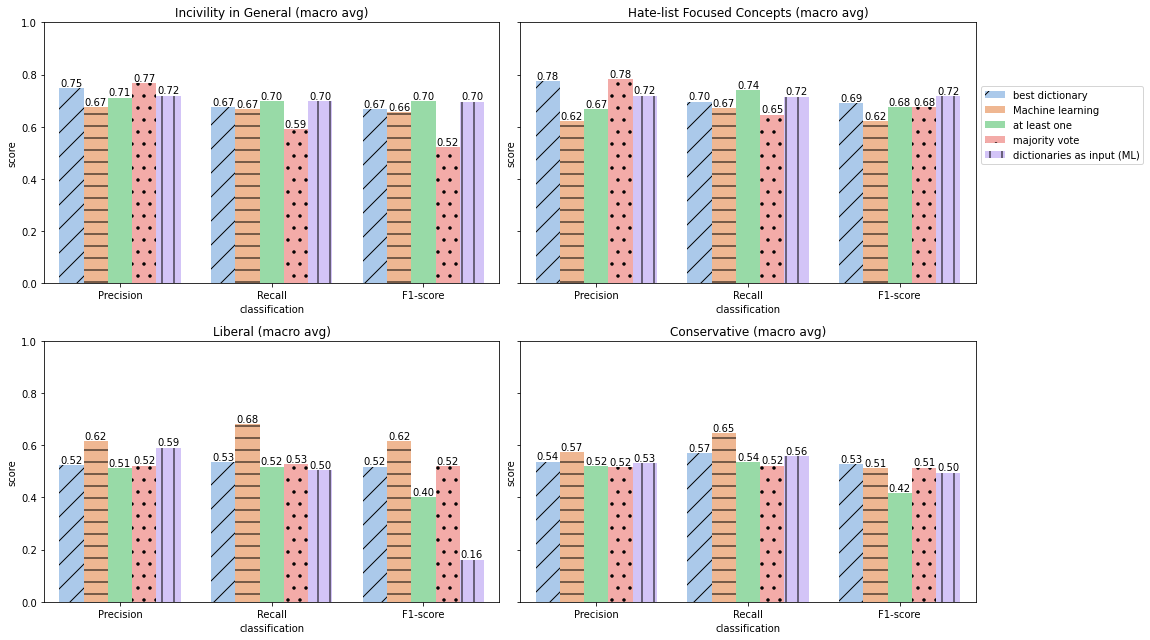

In [10]:
sns.set_palette("pastel")
def add_hatch_pattern(ax):
    hatches = ['/', '/', '/', '-','-','-', ' ', ' ', ' ','.', '.', '.', '|','|','|']
    for i, bar in enumerate(ax.patches):
        hatch = hatches[i % len(hatches)]
        bar.set_hatch(hatch)
        ax.text(bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f'{bar.get_height():.2f}',
                ha='center', va='bottom', fontsize=10)
hue_order = ['best dictionary','Machine learning', 'at least one', 'majority vote', 'dictionaries as input (ML)']
        
df = merged_df[merged_df['Class']=='macro avg']
        
fig, ax = plt.subplots(2, 2, sharey=True,figsize=(16, 9))

sns.barplot(ax=ax[0,0], data=df[df['Label']=='INCIVILITY_DUMMY'],hue='Measures',y='score',x='classification',hue_order=hue_order)
add_hatch_pattern(ax[0,0])
ax[0,0].set_title(f'Incivility in General (macro avg)')
ax[0,0].set(ylim=(0, 1))
ax[0,0].legend_.remove()

sns.barplot(ax=ax[0,1], data=df[df['Label']=='HATELIST_FOCUSED_DUMMY'],hue='Measures',y='score',x='classification',hue_order=hue_order)
add_hatch_pattern(ax[0,1])
ax[0,1].set_title(f'Hate-list Focused Concepts (macro avg)')
ax[0,1].legend_.remove()

sns.barplot(ax=ax[1,0], data=df[df['Label']=='LIBERAL_DUMMY'],hue='Measures',y='score',x='classification',hue_order=hue_order)
add_hatch_pattern(ax[1,0])
ax[1,0].set_title(f'Liberal (macro avg)')
ax[1,0].legend_.remove()

sns.barplot(ax=ax[1,1], data=df[df['Label']=='CONSERVATIVE_DUMMY'],hue='Measures',y='score',x='classification',hue_order=hue_order)
add_hatch_pattern(ax[1,1])
ax[1,1].set_title(f'Conservative (macro avg)')
ax[1,1].legend_.remove()

handles, labels = ax[0, 0].get_legend_handles_labels()
# for handle in handles:
#     handle.set_hatch('')

fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.8))
plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.savefig(f'outputs/plots/Merging dictionaries & macro avg (all).jpg',dpi=200)


/var/folders/8v/xpk1jpgx2kbgxh9xl6dwblt00000gp/T/ipykernel_39089/1959509108.py:6: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  bar.set_hatch(hatch)
/var/folders/8v/xpk1jpgx2kbgxh9xl6dwblt00000gp/T/ipykernel_39089/1959509108.py:6: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  bar.set_hatch(hatch)
/var/folders/8v/xpk1jpgx2kbgxh9xl6dwblt00000gp/T/ipykernel_39089/1959509108.py:6: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  bar.set_hatch(hatch)
/var/folders/8v/xpk1jpgx2kbgxh9xl6dwblt00000gp/T/ipy

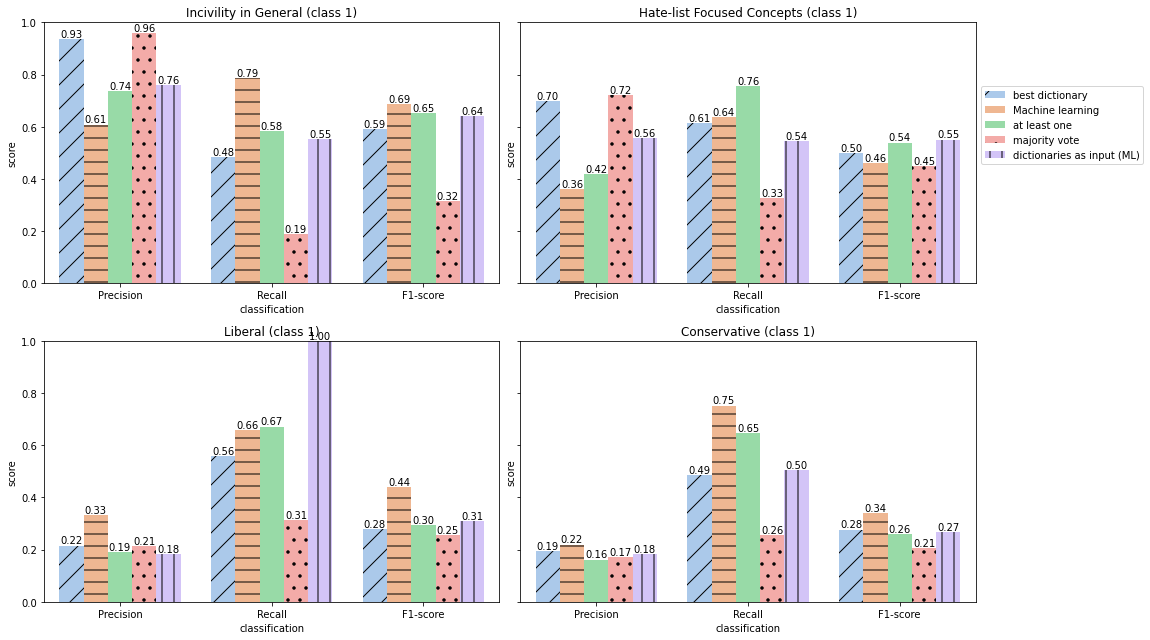

In [11]:
df = merged_df[merged_df['Class']=='1']

fig, ax = plt.subplots(2, 2, sharey=True,figsize=(16, 9))

sns.barplot(ax=ax[0,0], data=df[df['Label']=='INCIVILITY_DUMMY'],hue='Measures',y='score',x='classification',hue_order=hue_order)
add_hatch_pattern(ax[0,0])
ax[0,0].set_title(f'Incivility in General (class 1)')
ax[0,0].set(ylim=(0, 1))
ax[0,0].legend_.remove()

sns.barplot(ax=ax[0,1], data=df[df['Label']=='HATELIST_FOCUSED_DUMMY'],hue='Measures',y='score',x='classification',hue_order=hue_order)
add_hatch_pattern(ax[0,1])
ax[0,1].set_title(f'Hate-list Focused Concepts (class 1)')
ax[0,1].legend_.remove()

sns.barplot(ax=ax[1,0], data=df[df['Label']=='LIBERAL_DUMMY'],hue='Measures',y='score',x='classification',hue_order=hue_order)
add_hatch_pattern(ax[1,0])
ax[1,0].set_title(f'Liberal (class 1)')
ax[1,0].legend_.remove()

sns.barplot(ax=ax[1,1], data=df[df['Label']=='CONSERVATIVE_DUMMY'],hue='Measures',y='score',x='classification',hue_order=hue_order)
add_hatch_pattern(ax[1,1])
ax[1,1].set_title(f'Conservative (class 1)')
ax[1,1].legend_.remove()

handles, labels = ax[0, 0].get_legend_handles_labels()
# for handle in handles:
#     handle.set_hatch('')

fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.8))
plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.savefig(f'outputs/plots/Merging dictionaries & class 1 (all).jpg',dpi=200)